<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Initialization with Same Weights </h1>



<h3>Objective for this Notebook<h3>    
<h5> 1. Learn hw to Define the Neural Network with Same Weights Initialization define  Criterion Function, Optimizer, and Train the Model</h5>
<h5> 2.Define the Neural Network with defult Weights Initialization define  Criterion Function, Optimizer</h5>
<h5> 3. Train the Model </h5>     



<h2>Table of Contents</h2>
<p>In this lab, we will see the problem of initializing the weights with the same value. We will see that even for a simple network, our model will not train properly. .</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network with Same Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
    <li><a href="#Train">Define the Neural Network with defult Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


<h2>Preparation</h2>


We'll need the following libraries


In [1]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
from torch.utils.data import Dataset, DataLoader
import numpy as np
torch.manual_seed(0)

In [2]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

Used for plotting the model


<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


In [3]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0] > -4) & (self.x[:, 0] < 4)] = 1.0
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [4]:
data_set = Data()
trainloader = DataLoader(dataset = data_set, batch_size = 3)

<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 


In [5]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

Define the training function:


In [6]:
# Define the training function

def train(trainloader, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(1, epochs+1):
        X = []
        Y = []
        total=0
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item() 
            X.append(x.detach()[0].item())
            Y.append(y.detach()[0].item())
        cost.append(total)
        if epoch % 300 == 0:
            print(f'epoch {epoch}: loss {total:.4f}')
        X = torch.tensor(X).view(-1, 1).type(torch.FloatTensor)
        Y = torch.tensor(Y)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

- For `torch.optim.Optimizer.zero_grad`: <a href="https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch"> see here </a>
- For `torch.optim.Optimizer.step`: <a href="https://stackoverflow.com/questions/53975717/pytorch-connection-between-loss-backward-and-optimizer-step"> see here </a> and <a href="https://discuss.pytorch.org/t/how-are-optimizer-step-and-loss-backward-related/7350"> see here </a>

<!--Empty Space for separating topics-->


<!--Empty Space for separating topics-->


<h2 id="Train">Define the Neural Network with Same Weights Initialization define, Criterion Function, Optimizer and Train the Model</h2>


Create the Cross-Entropy loss function: 


In [7]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network


In [8]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)


This is the PyTorch default installation


In [9]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

Same Weights Initialization with all ones for weights and zeros for the bias.


In [10]:
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

Optimizer, and Train the Model:


epoch 300: loss 5.6139


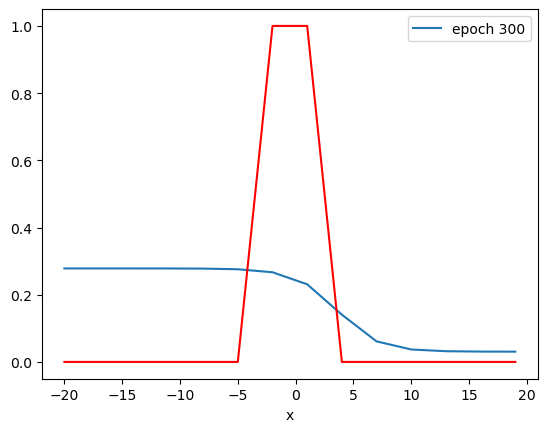

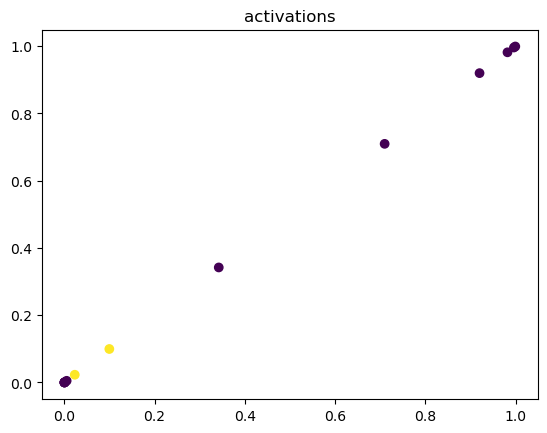

epoch 600: loss 5.2094


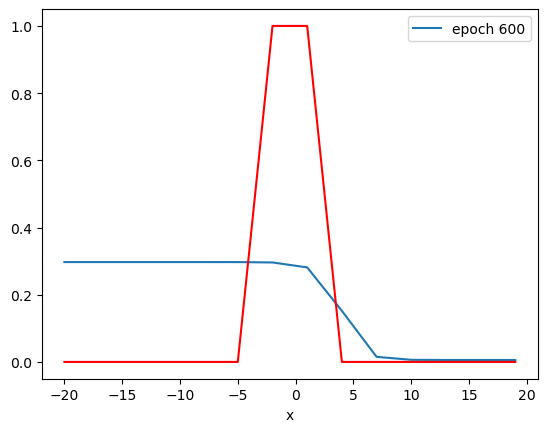

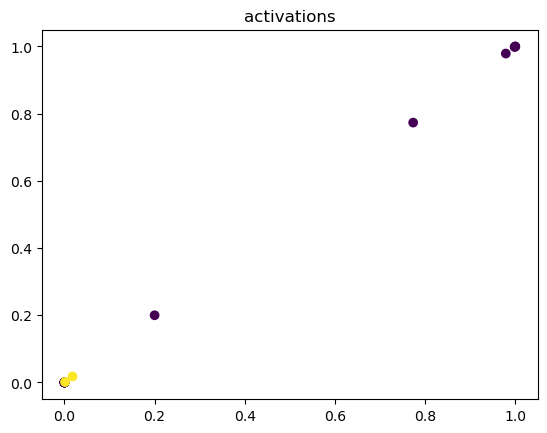

epoch 900: loss 5.1239


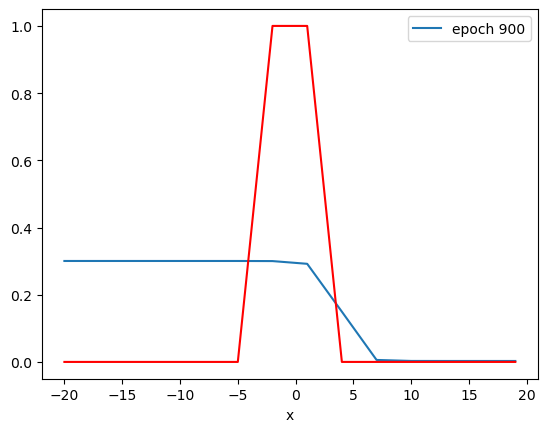

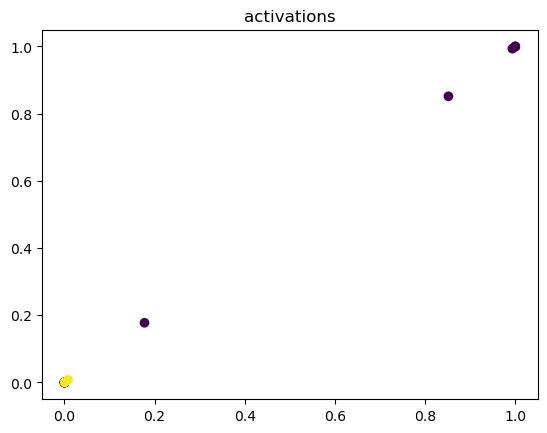

Text(0.5, 1.0, 'cross entropy loss')

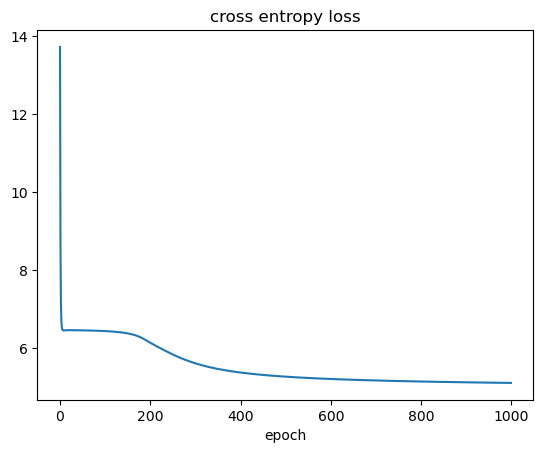

In [11]:
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(trainloader, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  paramters all thought they have changed they are identical.


In [12]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.1532],
                      [1.1532]])),
             ('linear1.bias', tensor([-6.1673, -6.1673])),
             ('linear2.weight', tensor([[-2.5995, -2.5995]])),
             ('linear2.bias', tensor([-0.8424]))])

In [13]:
yhat=model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

tensor([[0.3008],
        [0.2987],
        [0.2790]], grad_fn=<SigmoidBackward0>)

<h2 id="Train2">Define the Neural Network, Criterion Function, Optimizer and Train the Model </h2>


In [14]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)

In [15]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.4390],
                      [-0.4846]])),
             ('linear1.bias', tensor([ 0.9350, -0.6850])),
             ('linear2.weight', tensor([[ 0.3263, -0.5079]])),
             ('linear2.bias', tensor([0.2270]))])

Repeat the previous steps above by using the MSE cost or total loss: 


epoch 300: loss 1.5767


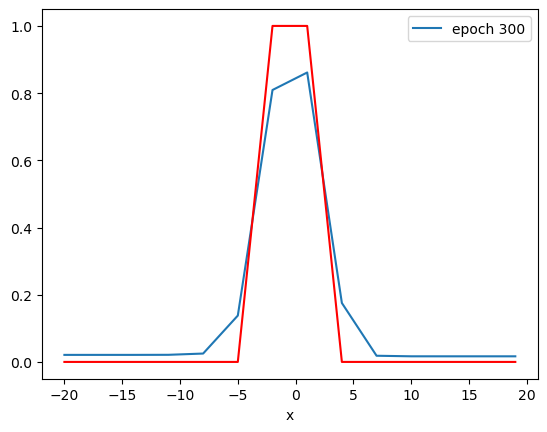

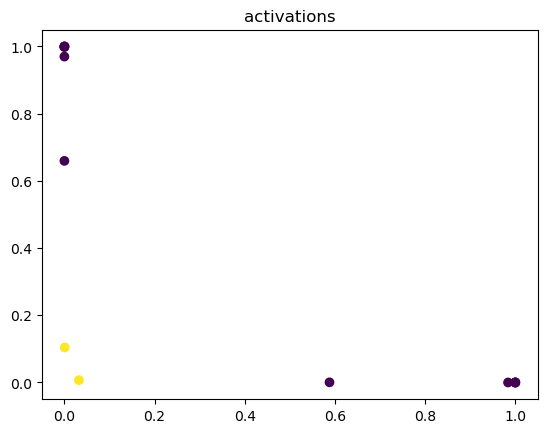

epoch 600: loss 1.1974


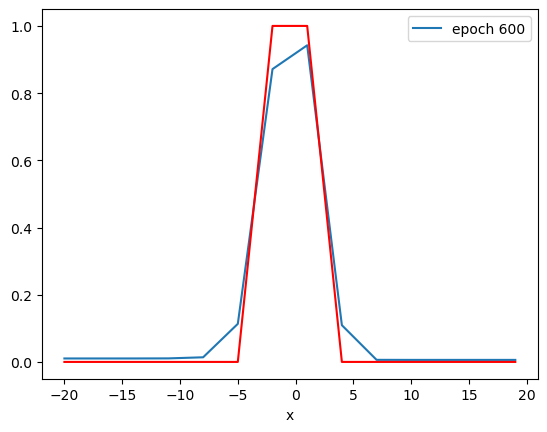

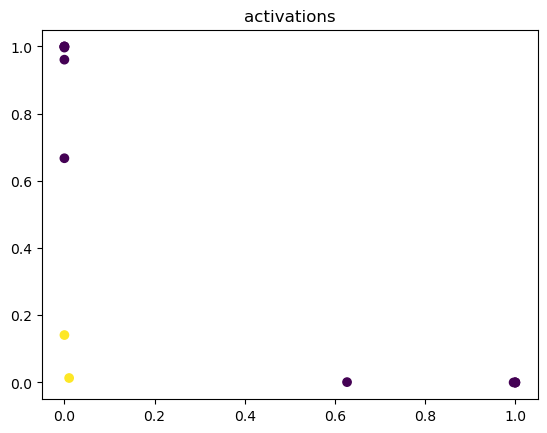

epoch 900: loss 1.0739


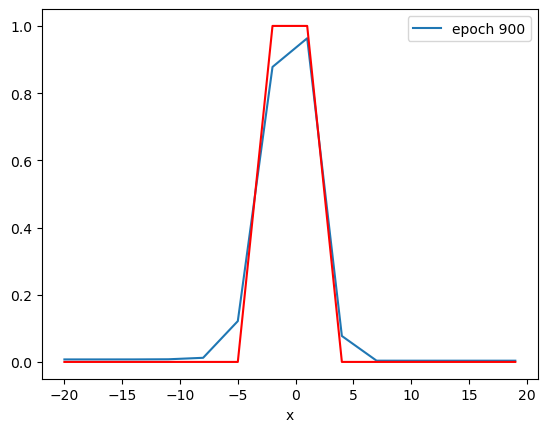

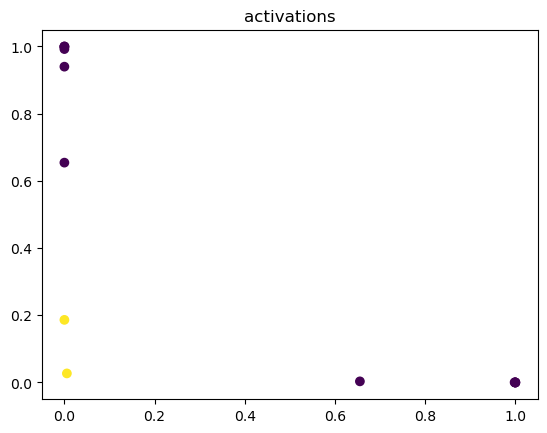

Text(0.5, 1.0, 'cross entropy loss')

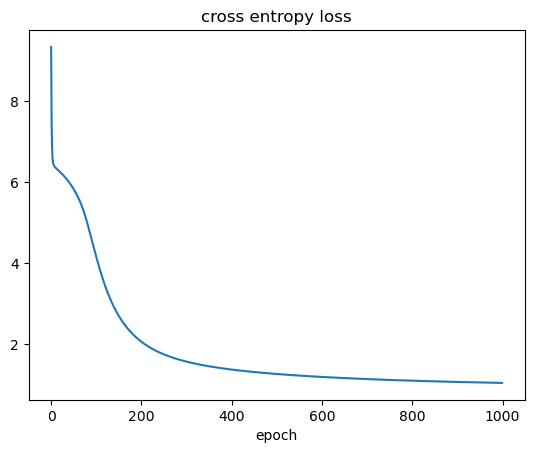

In [16]:
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(trainloader, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [17]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 2.0118],
                      [-0.6752]])),
             ('linear1.bias', tensor([-7.3703, -2.7496])),
             ('linear2.weight', tensor([[-9.4314, -8.6819]])),
             ('linear2.bias', tensor([3.7034]))])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 300: loss 1.9247


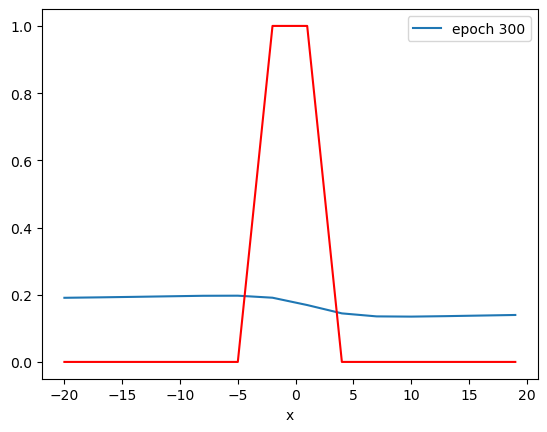

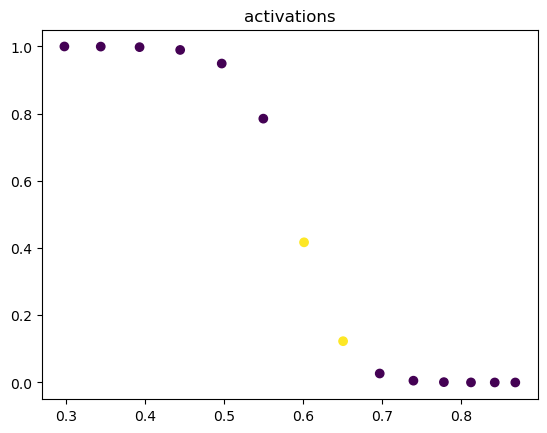

epoch 600: loss 1.1028


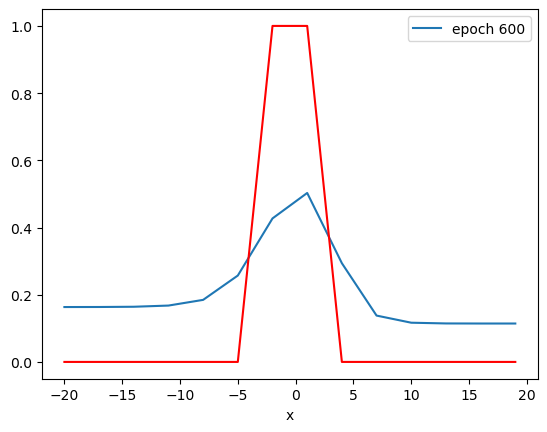

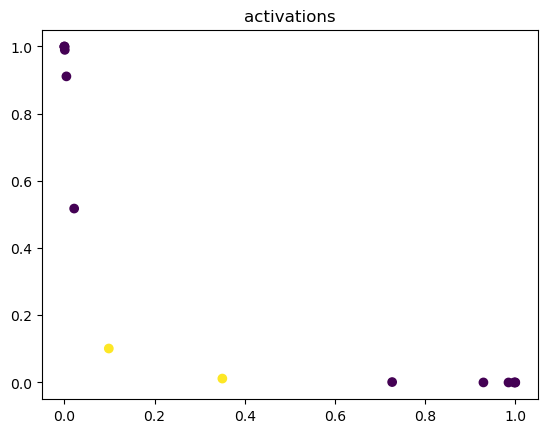

epoch 900: loss 0.4590


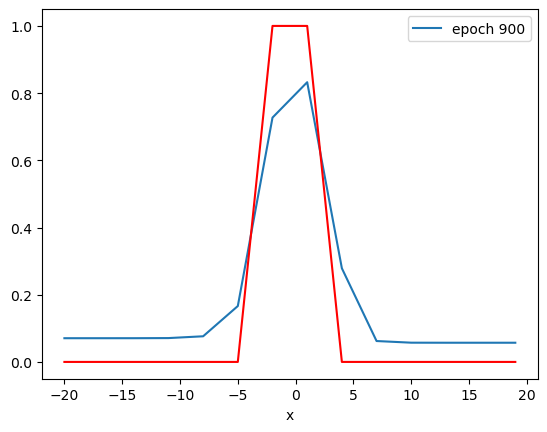

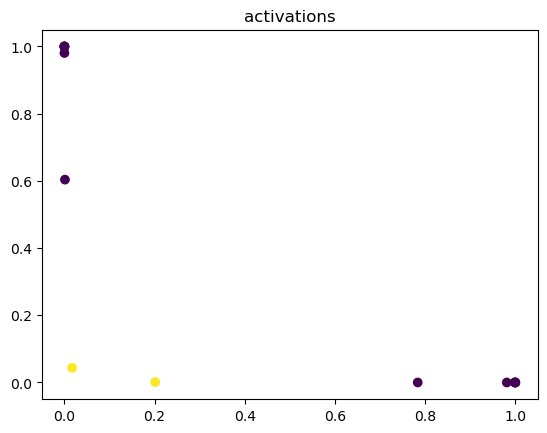

Text(0.5, 1.0, 'cross entropy loss')

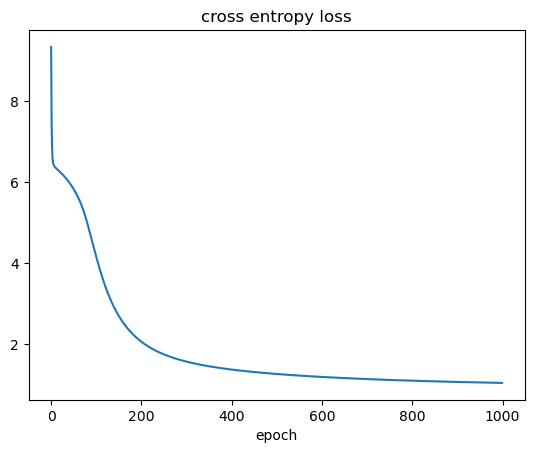

In [18]:
criterion = nn.MSELoss()
learning_rate = 0.1
model = Net(D_in,H,D_out)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_mse = train(trainloader, model, optimizer, criterion, epochs=1000)

plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>
-->

## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
